<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Материалы-по-проекту" data-toc-modified-id="Материалы-по-проекту-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Материалы по проекту</a></span></li><li><span><a href="#Загрузка-данных-и-подготовка-их-к-анализу" data-toc-modified-id="Загрузка-данных-и-подготовка-их-к-анализу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Загрузка данных и подготовка их к анализу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Категоризация-товаров" data-toc-modified-id="Категоризация-товаров-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Категоризация товаров</a></span></li><li><span><a href="#Кластеризация-покупателей-на-основе-истории-их-покупок" data-toc-modified-id="Кластеризация-покупателей-на-основе-истории-их-покупок-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Кластеризация покупателей на основе истории их покупок</a></span></li><li><span><a href="#Проверка-статистических-гипотез" data-toc-modified-id="Проверка-статистических-гипотез-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Проверка статистических гипотез</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

# Описание проекта

**Название проекта: E-commerce — Выявление профилей потребления**

**Цель исследования:**
Выявить закономерности: какие покупатели (сегменты) покупают какие товары (товарные категории) в какие периоды (сезоны) для разработки более персонализированных предложений и повышения продаж.

**Гипотеза:** в определенные сезоны покупатели увеличивают покупки определенных товаров.

**План работы:**

1.  Сделать предобработку данных
2.  Провести исследовательский анализ данных
3.  Выделить категории товаров (например: товары для дачи, посуда, товары для ремонта - посмотрим, какие категории выделяют обычно подобные магазины). Проверить получившиеся категории: как часто покупаются товары этой категории и сколько она приносит денег
4.  Выделить сегменты покупателей на основе истории их покупок (по категории товара, количеству, по частоте и сезонности).
Сделаем кластеризацию (инструмет ML) покупателей по показателям:
- Стоимость товара
- Кол-во товаров
- Общая сумма покупок
- Средний чек

Далее посмотрим на эти сегменты по сезонам.

5.  Сформулировать и проверить статистические гипотезы.
Например: есть статистически значимые отличия между сегментами покупателей.

6.  Сделать выводы, в какой сезон каким сегментам покупателей какие товарные категории предлагать.

**Описание данных:**

Датасет описывает транзакции интернет-магазина товаров для дома и быта «Пока все ещё тут».

Колонки в  *ecommerce_dataset.csv* :

- `date` — дата заказа;
- `customer_id` — идентификатор покупателя;
- `order_id` — идентификатор заказа;
- `product` — наименование товара;
- `quantity` — количество товара в заказе;
- `price` — цена товара.

# Материалы по проекту

[Презентация](https://drive.google.com/file/d/13W6QD1T38nW_pscqnpSO-Vv-AthCL5uJ/view?usp=sharing)

[Дашборд](https://public.tableau.com/app/profile/ekaterina1291/viz/-_16606394444260/Dashboard1?publish=yes)

# Загрузка данных и подготовка их к анализу

Загрузим бибилотеки, датасет и посмотрим на информацию по данным

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
import os
pth1 = 'C:/Users/Пользователь/OneDrive/Рабочий стол/Аналитик данных _ Яндекс практикум/Финальный проект/ecommerce_dataset.csv'
pth2 = '/datasets/ecommerce_dataset.csv'
if os.path.exists(pth1):
    data = pd.read_csv(pth1)
elif os.path.exists(pth2):
    data = pd.read_csv(pth2)
else:
    print("Проверьте правильность пути к датасету")

In [ ]:
data.head(5)

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         6737 non-null   int64  
 1   customer_id  6737 non-null   object 
 2   order_id     6737 non-null   int64  
 3   product      6737 non-null   object 
 4   quantity     6737 non-null   int64  
 5   price        6737 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


Видим 6 737 заказов, пропусков нет, названия колонок в змеином регистре.

In [ ]:
# Переведем даты из числового объекта в datetime и сразу удалим часы, т.к. они нам не нужны для анализа:
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d%H').dt.date
# Проверим:
data.head()

,date,customer_id,order_id,product,quantity,price
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


# Исследовательский анализ данных

In [ ]:
# Взглянем, какие у нас продукты заказывались:
data['product'].value_counts()

Рассада Кабачка сорт Зебра кассета 6 шт E6                                         79
Рассада Кабачка сорт Золотинка кассета 6 шт E6                                     78
Рассада Кабачка сорт Белогор кассета 6 шт E6                                       77
Рассада Огурца сорт Каролина кассета 6 шт E6                                       76
Пеларгония розебудная Red Pandora укорененный черенок                              76
                                                                                   ..
Азалия Индика фиолетовая d-10 см h-20                                               1
Чехол для гладильной доски I LOVE GIMI M из полиэстера и хлопка 132*48 см, Gimi     1
Петля рояльная цинк 960 мм, 1103055                                                 1
Весы напольные Edition Feet механические                                            1
Литопс Микс d-5 см                                                                  1
Name: product, Length: 2343, dtype: int64

Видим, что в датасете 2 235 уникальных продукта. Позже приступим к сегментации товаров по товарным категориям.

In [ ]:
data.describe()

,order_id,quantity,price
count,6737.000000,6737.000000,6737.000000
mean,43128.948345,2.501559,462.028499
std,27899.414662,15.266478,871.296064
min,12624.000000,1.000000,9.000000
25%,14827.000000,1.000000,101.000000
50%,68503.000000,1.000000,135.000000
75%,70504.000000,1.000000,398.000000
max,73164.000000,1000.000000,14917.000000


Видим, что в каждом заказе - 1 товар, но есть странная аномалия - 1000 штук. Цены на товары распределены не равномерно: от 9 до 14 917 ден. ед., однако 3/4 всех товаров - до 398 ден. ед.

Посмотрим на распределение данных в колонках `цена` и `количество`:

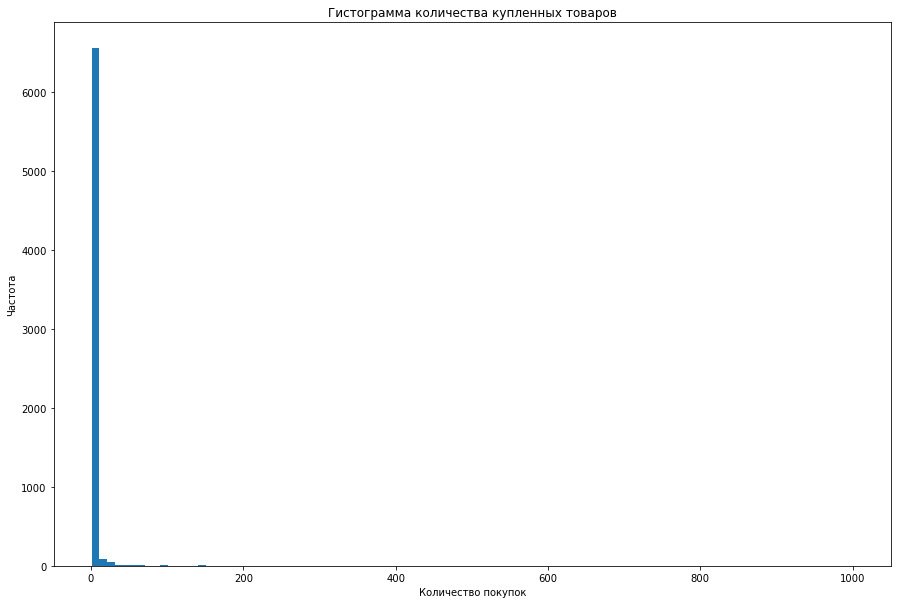

In [ ]:
data['quantity'].plot(
    figsize=(15,10),kind='hist', bins=100, title='Гистограмма количества купленных товаров')
plt.xlabel('Количество покупок')
plt.ylabel('Частота')
plt.show()

Взглянем на заказы, в которых больше 5 позиций товара:

In [ ]:
data[data['quantity']>5].sort_values(by='quantity', ascending=False)

,date,customer_id,order_id,product,quantity,price
5456,2019-06-18,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"Вантуз с деревянной ручкой d14 см красный, Bur...",1000,675.0
5071,2019-06-11,146cd9bf-a95c-4afb-915b-5f6684b17444,71668,Вешалки мягкие для деликатных вещей 3 шт шоколад,334,148.0
3961,2019-05-20,5d189e88-d4d6-4eac-ab43-fa65a3c4d106,71478,Муляж ЯБЛОКО 9 см красное,300,51.0
1158,2018-12-10,a984c5b7-ff7e-4647-b84e-ef0b85a2762d,69289,"Ручка-скоба РС-100 белая *Трибатрон*, 1108035",200,29.0
568,2018-11-01,aa42dc38-780f-4b50-9a65-83b6fa64e766,68815,Муляж ЯБЛОКО 9 см красное,170,51.0
...,...,...,...,...,...,...
2423,2019-03-22,273efa10-902f-4b90-a3c7-d59f95c9ee63,70831,"Гладильная доска НИКА ДСП ЭКОНОМ 106,5х29 ЭК1",6,449.0
3050,2019-04-23,b7b865ab-0735-407f-8d0c-31f74d2806cc,14680,томата (помидор) Колоновидный № 90 сорт детерм...,6,38.0
1587,2019-01-24,dfad9aa4-f5f7-4902-9e07-1dee83bc3506,69956,"Таз пластмассовый 16,0 л пищевой круглый М2507...",6,224.0
2399,2019-03-19,e6a2e8c3-2fe1-4aac-ae93-11d6e7c9f910,70788,Искусственная композиция из цветов пластиковая...,6,74.0


In [ ]:
np.percentile(data['quantity'], [90, 95, 99])

array([ 3.  ,  6.  , 26.64])

Удалим данные, где количество покупок больше 6 (по 95-ому перцентилю), считая их выбросами. На всякий случай сохраним оптовые данные в датасете data_opt.

In [ ]:
data_opt = data[data['quantity']>6].reset_index(drop=True)
data = data[data['quantity']<=6].reset_index(drop=True)

In [ ]:
data_opt

,date,customer_id,order_id,product,quantity,price
0,2018-10-01,161e1b98-45ba-4b4e-8236-e6e3e70f6f7c,68483,Вешалка для брюк металлическая с резиновым пок...,10,82.0
1,2018-10-01,0948b0c2-990b-4a11-b835-69ac4714b21d,68486,Крючок одежный 2-х рожковый серый металлик с п...,96,38.0
2,2018-10-02,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68493,Щетка-сметка 3-х рядная деревянная 450 мм (пло...,15,49.0
3,2018-10-02,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68493,Щетка-сметка 4-х рядная деревянная 300 мм (фиг...,15,70.0
4,2018-10-02,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68506,Герань домашняя (пеларгония зональная) цветуща...,11,142.0
...,...,...,...,...,...,...
314,2019-10-23,2fac41bf-e800-4bc3-a4b3-0df800f33e99,73073,"Ведро резинопластиковое строительное 12,0 л (М...",50,64.0
315,2019-10-25,14cc96d3-7d14-4e84-9c15-76e57b642c72,73092,Цветок искусственный Нарцисс одиночный в ассор...,25,20.0
316,2019-10-26,56710968-02ea-46b7-9638-0ad9fa8544d0,73095,Тимьян d-9 см,8,119.0
317,2019-10-26,56710968-02ea-46b7-9638-0ad9fa8544d0,73095,Тимьян d-9 см,8,119.0


Аналогично взглянем на распределение цены и посмотрим самые дорогие товары:

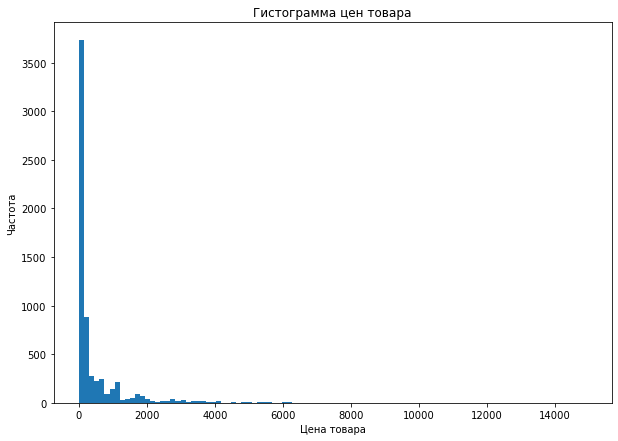

In [ ]:
data['price'].plot(
    figsize=(10,7),kind='hist', bins=100, title='Гистограмма цен товара')
plt.xlabel('Цена товара')
plt.ylabel('Частота')
plt.show()

In [ ]:
data[data['price']>3000].sort_values(by='price', ascending=False).head(10)

,date,customer_id,order_id,product,quantity,price
5717,2019-07-29,0d87f4ae-465a-4fac-81e6-5d629761783e,72139,Сушилка уличная Leifheit 85210 LINOMATIC V 400...,1,14917.0
2509,2019-04-05,c0c60544-3a99-49d0-8a8e-cf7f293c22cb,71035,Сумка-тележка хозяйственная Andersen Royal Sho...,1,8737.0
1849,2019-02-24,ac250053-a236-467a-97d2-ddbb9bf4a1ba,70423,Сумка-тележка хозяйственная Andersen Alu Star ...,1,8437.0
2793,2019-04-21,19d904d8-8d16-476d-8f66-b2a3b7a23660,71227,Сумка-тележка хозяйственная Rolser MNB019 rojo...,1,8077.0
6321,2019-10-16,d5584388-ffbe-42fd-a746-a98828ec919f,72992,Стремянка 7 ступенчатая Hailo 8040-707 XXL 13 ...,1,7724.0
5719,2019-07-30,e2fe6b48-1955-4882-925c-733f545df026,72140,Сумка-тележка хозяйственная Rolser MNB017 fucs...,1,7679.0
2183,2019-03-14,27d4ce42-352b-4756-bf5b-8724e05d5131,70740,Сумка-тележка хозяйственная Rolser IMX006 bass...,1,7679.0
610,2018-11-05,fc333417-1d11-4a2a-b946-0957ae0603e9,68872,Сумка-тележка хозяйственная Rolser MOU041 malv...,1,7597.0
1158,2018-12-17,86c97bf1-c834-423e-9e38-8acda68f97e8,69417,Гладильная доска Leifheit AirBoard Compact M P...,1,7424.0
5888,2019-08-23,8d85f320-5f55-4647-814c-da1a6b21c2a4,72381,Урна уличная стальная Сальвадор 02.021.0 46х11...,1,7349.0


Аномалий по цене не выявлено.

In [ ]:
# Проверим дубликаты:
data.duplicated().sum()

950

In [ ]:
data[data.duplicated(keep=False)].head()

,date,customer_id,order_id,product,quantity,price
53,2018-10-02,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0
54,2018-10-02,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0
55,2018-10-02,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0
74,2018-10-04,32de7df8-8d4f-4c84-a7b9-c41d00dd83ba,68522,Эвкалипт Гунни d-17 см h-60 см,1,1409.0
87,2018-10-04,32de7df8-8d4f-4c84-a7b9-c41d00dd83ba,68522,Эвкалипт Гунни d-17 см h-60 см,1,1409.0


In [ ]:
# Поищем скрытые дубликаты:
data[['customer_id', 'order_id', 'product']].duplicated(keep=False).sum()

2302

Видим, что треть датасета - это дубликаты. Взглянем на них:

In [ ]:
data[data[['customer_id', 'order_id', 'product']].duplicated(keep=False)]

,date,customer_id,order_id,product,quantity,price
13,2018-10-01,17213b88-1514-47a4-b8aa-ce51378ab34e,68476,"Мини-сковорода Marmiton ""Сердце"" с антипригарн...",1,239.0
14,2018-10-01,17213b88-1514-47a4-b8aa-ce51378ab34e,68476,Сковорода алюминиевая с антипригарным покрытие...,1,824.0
15,2018-10-01,17213b88-1514-47a4-b8aa-ce51378ab34e,68476,Стеклянная крышка для сковороды ALPENKOK 26 см...,1,262.0
16,2018-10-01,17213b88-1514-47a4-b8aa-ce51378ab34e,68476,"Сушилка для белья напольная Colombo Star 18, 3679",1,1049.0
17,2018-10-01,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0
...,...,...,...,...,...,...
6397,2019-10-30,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,"Таз пластмассовый со стиральной доской (Иж), 1...",1,397.0
6398,2019-10-30,344aa778-e436-419e-a9c6-9b8f37b7c1df,73137,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1087.0
6409,2019-10-31,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,"Таз пластмассовый со стиральной доской (Иж), 1...",1,397.0
6410,2019-10-31,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,"Таз пластмассовый со стиральной доской (Иж), 1...",1,397.0


In [ ]:
# Посмотрим на примере мини-сковороды (строка с индексом 15), как дублируются товары:
data[data['customer_id']==data['customer_id'][15]]

,date,customer_id,order_id,product,quantity,price
13,2018-10-01,17213b88-1514-47a4-b8aa-ce51378ab34e,68476,"Мини-сковорода Marmiton ""Сердце"" с антипригарн...",1,239.0
14,2018-10-01,17213b88-1514-47a4-b8aa-ce51378ab34e,68476,Сковорода алюминиевая с антипригарным покрытие...,1,824.0
15,2018-10-01,17213b88-1514-47a4-b8aa-ce51378ab34e,68476,Стеклянная крышка для сковороды ALPENKOK 26 см...,1,262.0
16,2018-10-01,17213b88-1514-47a4-b8aa-ce51378ab34e,68476,"Сушилка для белья напольная Colombo Star 18, 3679",1,1049.0
250,2018-10-16,17213b88-1514-47a4-b8aa-ce51378ab34e,68476,"Мини-сковорода Marmiton ""Сердце"" с антипригарн...",1,239.0
251,2018-10-16,17213b88-1514-47a4-b8aa-ce51378ab34e,68476,Сковорода алюминиевая с антипригарным покрытие...,1,824.0
252,2018-10-16,17213b88-1514-47a4-b8aa-ce51378ab34e,68476,Стеклянная крышка для сковороды ALPENKOK 26 см...,1,262.0
253,2018-10-16,17213b88-1514-47a4-b8aa-ce51378ab34e,68476,"Сушилка для белья напольная Colombo Star 18, 3679",1,1049.0


Видим, что у нас повторяется id покупателя и заказа, а также товар. Предполагаем, что это был сбой в системе, т.к. если бы человек хотел два раза купить один и тот же товар, то `order_id` должен был бы отличаться.
Поэтому удалим все дубликаты, оставив только последний дубликат `keep='last'` в надежде, что последняя попытка покупки была удачной.

In [ ]:
data = data.drop_duplicates(subset = ('customer_id', 'order_id', 'product'), keep='last').reset_index(drop=True)
data.head()

,date,customer_id,order_id,product,quantity,price
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


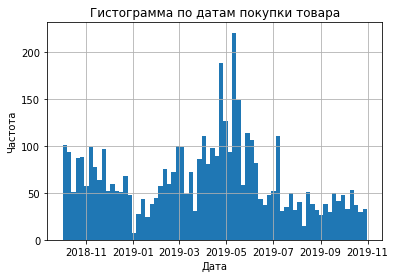

In [ ]:
# Взглянем на распределение данных по дате:
data['date'].hist(bins= 70)
plt.xlabel('Дата')
plt.ylabel('Частота')
plt.title('Гистограмма по датам покупки товара')
plt.show()

Видим, что у нас данные с ноября 2018 года по ноябрь 2019 года, в мае всплеск заказов, а начало января - спад. Предполагаем, что в мае закупаются дачники.

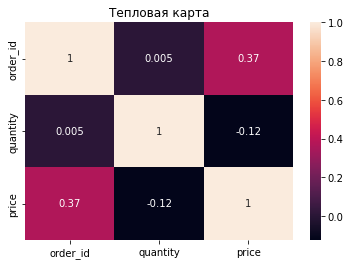

In [ ]:
# Посмотрим на корреляции в данных:
cm = data.corr()
sns.heatmap(cm, annot=True)

plt.title('Тепловая карта')
plt.show()

Видим занятную слабую корреляцию между ценой и номером id заказа. По всем видимости, цена на товары росла в течение года.

In [ ]:
data.groupby('order_id')['customer_id'].count().sort_values(ascending=False)

order_id
14698    51
14715    36
14688    31
14753    30
14835    29
         ..
70079     1
70078     1
70077     1
70075     1
73164     1
Name: customer_id, Length: 2565, dtype: int64

Вероятно, это сбой в системе: один заказ не может быть совершен нексолькими пользователями. Посмотрим на эти заказы:

In [ ]:
# Создадим временный датасет, куда запишем заказы, совершенные 2 и более пользователями:
t=data.groupby('order_id')['customer_id'].nunique() > 1
t=t[t==True]
t

order_id
14872    True
68785    True
69283    True
69345    True
69410    True
69485    True
69531    True
69833    True
70542    True
70631    True
70726    True
70808    True
70903    True
70946    True
71226    True
71461    True
71480    True
71542    True
71571    True
71648    True
71663    True
72188    True
72778    True
72790    True
72950    True
Name: customer_id, dtype: bool

In [ ]:
# взглянем на эти заказы:
data.query('order_id in @t.index').head(10)

,date,customer_id,order_id,product,quantity,price
404,2018-10-28,0b5ce2c7-acef-4a9a-b821-61a44ed05557,68785,"Сиденье в ванну раздвижное, белый, СВ5, НИКА",1,374.0
428,2018-10-30,c1dd5c0e-51db-4a5d-91a3-5374cb20043d,68785,"Сиденье в ванну раздвижное, белый, СВ5, НИКА",1,374.0
941,2018-12-10,2f955596-4b13-432e-93f3-6433395aafe6,69283,Сушилка для белья на батарею НИКА СБ6-65 двухъ...,1,164.0
946,2018-12-10,e3805ccd-2d64-4d0e-92dd-902293555c35,69283,Сушилка для белья на батарею НИКА СБ6-65 двухъ...,1,164.0
977,2018-12-13,70d60304-4b3c-4f34-9430-1872ec6e6309,69345,Сушилка для белья Attribute ПРИМА 18 м синяя A...,1,974.0
988,2018-12-15,22e4d79f-3613-4c22-8b01-7f880120bf5a,69345,Сушилка для белья Attribute ПРИМА 18 м синяя A...,1,974.0
1008,2018-12-17,4ea06f66-0876-4dec-8d14-ea994ffe435f,69410,Муляж Желудь 2 шт,3,22.0
1026,2018-12-18,caaa3f41-c9ab-4e3d-8b75-94e1d3a8d7b4,69410,Муляж Желудь 2 шт,3,22.0
1046,2018-12-20,5be0f4b4-947f-4672-b147-73ef5936ecd4,69485,Набор столовых приборов 24 предмета SAINT GERM...,1,1087.0
1055,2018-12-21,266beb08-ec9b-43b4-89bb-ac60fa23ffee,69485,Набор столовых приборов 24 предмета FARANDOLE ...,1,1274.0


Видим, что один заказ совершили разные пользователи, но купили один и тот же продукт. Скорей всего - это был один пользователь, который или зашел с разных устройств или был сбой в системе.

In [ ]:
# Оставим только те заказы, которые совершены только 1 пользователем:
t1 = data.query('order_id in @t.index').drop_duplicates(subset = ('order_id')).index
data = data.query('order_id not in @t1').reset_index(drop=True)
data

,date,customer_id,order_id,product,quantity,price
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
...,...,...,...,...,...,...
4581,2019-10-31,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73156,"Таз пластмассовый 40,0 л пищевой овальный (Иж)...",1,404.0
4582,2019-10-31,1f0a7f35-7459-4f23-b468-5e45bf481dd1,73158,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1087.0
4583,2019-10-31,25df96a7-c453-4708-9cea-a3dfc7c342ea,73162,Герань домашняя (пеларгония зональная) цветуща...,1,157.0
4584,2019-10-31,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73164,"Таз пластмассовый со стиральной доской (Иж), 1...",1,397.0


# Категоризация товаров

In [ ]:
# Посмотрим, сколько у нас уникальных товаров:
print ('Количество уникальных товаров:', len(data['product'].value_counts()))

Количество уникальных товаров: 2214


In [ ]:
data.head()

,date,customer_id,order_id,product,quantity,price
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


In [ ]:
# Посмотрим на продукты и попробуем их категоризировать. Для этого сначала выделим первое слово и выведем уникальные продукты:

category = []
for i in range(len(data)):
    t = data['product'][i].split(' ')[0]
    category.append(t)
category

data['cat'] = category
print ('Количество условных категорий по первому слову:', len(data['cat'].value_counts()))
data['cat'].value_counts().head(20)

Количество условных категорий по первому слову: 439


Пеларгония       703
Рассада          464
Сушилка          276
Сумка-тележка    235
Петуния          141
томата           138
Муляж            134
Гладильная       118
Герань           109
Коврик           101
Тележка           97
Чехол             87
Штора             76
Однолетнее        62
Таз               62
Роза              54
Калибрахоа        50
Бакопа            37
Набор             34
Корзина           33
Name: cat, dtype: int64

In [ ]:
# По первому слову сложно отнести товар к той или иной категории. Выделим первые 3 слова и выведем уникальные продукты:

category = []
for i in range(len(data)):
    t = data['product'][i].split(' ')[0] + ' ' + data['product'][i].split(' ')[1] + ' ' + data['product'][i].split(' ')[2]
    category.append(t)
category

data['cat'] = category
print ('Количество условных категорий:', len(data['cat'].value_counts()))
data['cat'].value_counts().head(20)

Количество условных категорий: 1322


Сушилка для белья                     271
Пеларгония зональная диам.            266
Рассада зелени для                    219
Герань домашняя (пеларгония           109
Сумка-тележка 2-х колесная             93
Тележка багажная DELTA                 83
Гладильная доска НИКА                  69
Пеларгония розебудная Red              65
Штора для ванной                       62
Пеларгония розебудная Prins            57
Чехол для гладильной                   55
Сумка-тележка хозяйственная Rolser     45
Пеларгония зональная махровая          44
Рассада Арбуза сорт                    40
Пеларгония розебудная Mary             39
Пеларгония Toscana Angeleyes           37
Петуния махровая рассада               35
Рассада Капусты белокачанная           33
Пеларгония розебудная Queen            30
Однолетнее растение Петуния            29
Name: cat, dtype: int64

In [ ]:
# Добавим столбец "total" - сумма продаж за товар в корзине:
data['total'] = data['quantity']*data['price']
data

,date,customer_id,order_id,product,quantity,price,cat,total
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,Комнатное растение в,142.0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,Комнатное растение в,194.0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,Радермахера d-12 см,112.0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,Хризолидокарпус Лутесценс d-9,179.0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,Циперус Зумула d-12,112.0
...,...,...,...,...,...,...,...,...
4581,2019-10-31,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73156,"Таз пластмассовый 40,0 л пищевой овальный (Иж)...",1,404.0,"Таз пластмассовый 40,0",404.0
4582,2019-10-31,1f0a7f35-7459-4f23-b468-5e45bf481dd1,73158,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1087.0,Сумка-тележка 2-х колесная,1087.0
4583,2019-10-31,25df96a7-c453-4708-9cea-a3dfc7c342ea,73162,Герань домашняя (пеларгония зональная) цветуща...,1,157.0,Герань домашняя (пеларгония,157.0
4584,2019-10-31,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73164,"Таз пластмассовый со стиральной доской (Иж), 1...",1,397.0,Таз пластмассовый со,397.0


In [ ]:
# Посмотрим, какие условные категории принесли больше всего денег:
data.groupby('cat')['total'].sum().sort_values(ascending=False).head(20)

cat
Сушилка для белья                       276240.0
Сумка-тележка хозяйственная Rolser      209249.0
Сумка-тележка 2-х колесная              132378.0
Сумка-тележка хозяйственная Andersen    123843.0
Гладильная доска НИКА                   106545.0
Штора для ванной                         75776.0
Тележка багажная DELTA                   62302.0
Пеларгония зональная диам.               55130.0
Сумка-тележка 3-х колесная               36887.0
Сумка-тележка хозяйственная GIMI         33659.0
Сумка-тележка хозяйственная Gimi         32045.0
Рассада зелени для                       30941.0
Чехол для гладильной                     30076.0
Коврик для ванной                        25305.0
Урна уличная "Гео",                      24370.0
Гладильная доска Sarayli                 23392.0
Мусорный контейнер Hailo                 19085.0
Герань домашняя (пеларгония              18270.0
Сумка-тележка TWIN стальной              17993.0
Стремянки Colombo Leonardo               17658.0
Name: total, dty

Выделим следующие категории:
1.	Растения
2.	Хозяйственные товары
3.	Товары для строительства и ремонта
4.	Текстиль для дома
5.	Рассада и семена
6.  Посуда
7.  Декор и интерьер

In [ ]:
# Создадим словарь товаров под каждую категорию:
dict_category = {'Растения': ('Замиокулькас', 'Кампанула', 'Крассула', 'Фиттония',  'Фикус', 'Физостегия', 'Фатсия', 'Хоста', 'Хамедорея', 'Цинерария', 'Эхинокактус', 'Эхинацея', 'Эпипремнум', 'Энотера', 'Цитрофортунелла', 'Цинния', 'Импатиенс',  'Иссоп', 'Каллуна', 'Калоцефалус', 'Калоцефалус', 'Капсикум', 'Кипарисовик', 'Виола', 'Гайлардия', 'крупноцветков', 'Гимнокалициум', 'Глоксиния', 'Джункус', 'Гортензия', 'Дендробиум', 'Зверобой', 'Диффенбахия', 'Драцена', 'Бузульник', 'ербера', 'Литопс', 'Лилейник', 'Юкка', 'Каланхое', 'Лаванда', 'Барвинок', 'Лантана ', 'Суккулент', 'Мелисса', 'Бадан', 'Афеляндра', 'Соланум', 'Муррайя', 'Астра', 'Молодило', 'Аспарагус', 'Лавр', 'Солидаго', 'Монарда', 'Артемизия', 'Мята', 'Синнингия', 'Рудбекия', 'Нефролепис', 'Анемона', 'Нолина', 'Скиммия', 'Пуансетия', 'Альбука', 'Азалия', 'Пеперомия', 'Пряные травы', 'Осина', 'Сантолина', 'Пахира', 'Платикодон', 'Адиантум', 'Подсолнечник', 'Подсолнечник', 'Пиретрум', 'Аквилегия', 'Кореопсис', 'Алоэ', 'Лапчатка', 'Лапчатка', 'Антуриум', 'Спатифиллум', 'Укроп', 'Антуриум', 'Земляника', 'Лен', 'Цикламен', 'Калатея', 'Хризантема', 'Девичий виноград', 'Розмарин', 'Душица', 'Бальзамин', 'Шеффлера', 'Бегония', 'Фаленопсис', 'Вероника колосковая', 'Пуансеттия', 'Гипсофила', 'Фиалка', 'Гардения', 'Роза', 'Папоротник', 'Примула', 'Вербейник', 'Ясколка', 'Эхеверия', 'Котовник', 'Нивянник', 'Флокс', 'Тимьян', 'Кофе Арабика', 'Мирт', 'Камнеломка', 'Вербена','Аптения', 'Седум', 'Чабер', 'Лобелия', 'Мединилла', 'Мимоза', 'Фуксия', 'фиалка', 'Колокольчик', 'Хлорофитум', "еларгония", 'Эвкалипт', 'в горшке', 'Бакопа', "ерань", 'алибрахоа', 'адермахер', 'ризолидокарпус', 'астени', 'иперус', 'етуни', 'черенок', 'Ель'),
                'Хозяйственные товары': ('Корзинка ', 'микрофибры', 'Ванна', 'Мусорный контейнер', 'прищепок',  'Отбеливатель', 'Пружина', 'Решетка', 'Сетка для глажения', 'Скребок', 'Сметка', 'порошок', 'Стяжки', 'Ткань для окон', 'Линейка', 'Короб', 'Кольца для штор', 'Корзина', 'Крючок', 'Фиксатор', 'Фен', 'Фал капроновый', 'пепельница', 'Урна', 'Уголок',  'микрофибра', 'Увлажняющая маска', 'Электроштопор', 'Штангенциркуль', 'Шпингалет', 'Шпагат', 'Шнур', 'хозяйственный', 'пятен', 'Стяжка', 'Ковш', 'Утюг', 'Фоторамка', 'скоба', 'Завертка', 'Зубная паста', 'угольник', 'Губка', 'Кипятильник', 'оробка', 'Вантуз', 'Веревка', 'Держатель', 'Доска гладильная', 'Ерш', 'мыло', 'ешалк', 'Крепеж', 'Шило', 'прищепк', 'Веник', 'Корзина на колесах', 'сантехни', 'напильников', 'Лоток KNIT', 'для белья', 'Многофункциональный инструмент', 'стирки', 'мусор', 'для стирки', 'блок для ролика', 'Скребок для окон', 'Мыло', 'мебельная', 'Рассекатель', 'инструментов в алюминиевом', 'вешалок', 'ржавчин', 'сверел', 'для чистки', 'асадка', 'Антинакипин', 'Совок', 'посудомоечных', 'пробки', 'Антижир', 'Сиденье для ванны пластмассовое', 'швабр', 'Сверло', 'Пена для ванн', 'Пылесос', 'Пьезозажигалка', 'Светильник', 'Пробка', 'Паста', 'ведра', 'для мусора', 'для хранения', 'Ящик', 'Петля', 'Прищепк', 'приварна', 'приварная', 'Подголовник', 'Этажерка', 'Ёрш', 'Бензин', 'Полка', 'Миксер', 'Чайник', 'Щетка', 'Паста зубная', 'хозяйственная', 'Плечики', 'сварка', 'Перчатки', 'Ведро', 'для мытья', 'Стеллаж', 'Термометр', 'Тряпкодержатель', 'Весы', 'водопровод', 'Кофр', 'Корзина для белья', 'Корзина пластиковая для белья', 'Вешалка', 'Подставка для обуви', 'Комод', 'Щетка для мытья', 'Швабра', 'Полки', 'Окномойка', 'ушилка', 'умка-тележка', 'ележк', 'доска', 'Ящик почтовый', 'Подрукавник', 'для гладильной доски'),
                'Товары для строительства и ремонта': ('тремянк', 'Таз', 'таз', 'Корыто', 'Карниз', 'Штанга для ванной'),
                'Текстиль для дома': ('Наматрацник', 'постельного белья', 'скатерть', 'постельное белье', 'Халат', 'полотенец', 'халат','Наволочка', 'Наматрасник', 'Одеяло', 'Пододеяльник', 'Простын', 'Плед', 'Полотенце', 'Подушка', 'Покрывало', 'Скатерть', 'Салфетка', 'салфет', 'ехол', 'оврик', 'полотенце', 'Сиденье в ванну', 'Штора'),
                'Рассада и семена': ('Эшшольция', 'Тюльпан', 'Цинния', 'Тыква', 'Клубника', 'Капуста декоративная', 'Гвоздика', 'Георгина', 'Годеция', 'Горох', 'Космея', 'Кабачок', 'Бархатцы', 'Календула', 'Лаватера', 'Баклажан','Львиный зев','Салат', 'Детская сладость', 'Смолевка', 'Ранункулус', 'Настурция ','Незабудка', 'Огурец', 'Патиссон','Петрушка ','луковиц', 'в кассете', 'Алиссум','Томат', 'Капуста цветная Альфа', 'ассад', 'томат', 'Арбуз', 'Дыня', 'Базилик'),
                'Посуда': ('Тортница', 'Термос', 'Толкушка', 'Контейнер для приготовления', 'Котел', 'кружка', 'Чайный набор', 'Половник', 'для выпечки', 'Картофелемялка', 'Контейнер герметичный', 'Контейнер для СВЧ', 'Венчик', 'дуршлаг', 'Доска разделочная', 'Емкость для СВЧ', 'Емкость для соуса', 'Бульонница', 'Блюдце', 'Бидон', 'эмалированный', 'Лопатка', 'ложка','нож', 'Сито', 'сковород', 'Скалка', 'Кружка', 'Соковыжималка', 'Сотейник', 'посуды', 'для пикника', 'кондитерский', 'Соковарка', 'бокал', 'кекс', 'кружек', 'Рыбочистка', 'стакан', 'фужер', 'салатник', 'Орехоколка', 'Отделитель косточек', 'Овощечистка', 'Противень', 'для продуктов', 'для яйца','Пресс для чеснока', 'ножей', 'столовых', 'Сковорода', 'Tepмокружка', 'Стакан', 'Крышка', 'Блюдо', 'Кастрюля', 'Сахарница', 'Просеиватель', 'Банка', 'Овощеварка', 'Хлебница', 'Терка', 'Тарелка', 'Ложка', 'Контейнер для овощей', 'Вилка', 'Термокружка', 'Кувшин', 'Нож', 'Миска', 'банка', 'асленка', 'Мантоварка', 'Салатник', 'Овсянница', 'Измельчитель овощей'),
                'Декор и интерьер': ('Ваза', 'Искусственный лист Клена', 'Ковер', 'Ключница', 'Салфетница','Мыльница', 'ковров', 'Обувница','пуф', 'Подставка для цветов', 'Ковёр', 'кашпо', 'Стакан для ванной комнаты', 'Дозатор для мыла', 'Декоративная композиция',  'Искусственный цветок', 'уляж', 'плетеный с крышкой', 'Цветок искусственный', 'Искусственная лиана', 'Искусственная композиция из цветов')
                }
# Напишем цикл, который пробежит по каждой строке и значениям словаря и запишет категорию в датасет:
data['category']=0
for i in range(len(data)):
    for j in dict_category.keys():
        for k in dict_category[j]:
            if k in data['product'][i] :
                if data['category'][i] == 0:
                    data['category'][i]=j

C:\Users\73B5~1\AppData\Local\Temp/ipykernel_2740/4058534222.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['category'][i]=j
C:\programs\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
# Проверим, что у нас не осталось товаров без категории:
data[data['category'] == 0].value_counts('product').head(50)

Series([], dtype: int64)

In [ ]:
# Удалим вспомогательный столбец cat:
data = data.drop('cat', axis=1)

In [ ]:
# Посмотрим, какую долю занимает каждая категория в общем доходе:
data.groupby('category')['total'].sum() / data['total'].sum()

category
Декор и интерьер                      0.015853
Посуда                                0.055013
Рассада и семена                      0.026152
Растения                              0.142611
Текстиль для дома                     0.107770
Товары для строительства и ремонта    0.056324
Хозяйственные товары                  0.596277
Name: total, dtype: float64

In [ ]:
# Посмотрим, какую долю занимает каждая категория в общем количестве купленных товаров:
data.groupby('category')['quantity'].sum() / data['quantity'].sum()

category
Декор и интерьер                      0.055629
Посуда                                0.076201
Рассада и семена                      0.160632
Растения                              0.385286
Текстиль для дома                     0.065504
Товары для строительства и ремонта    0.026827
Хозяйственные товары                  0.229921
Name: quantity, dtype: float64

60% выручки приносят хозяйственные товары. А по количеству проданных товаров лидируют растения (39%)

Посмотрим на выручку и количество купленных товаров по категориям в разрезе рассматриваемого периода:

In [ ]:
# Создадим столбец month, в который запишем год и месяц (без даты):
data['month']=0
for i in range(len(data)):
    data['month'][i] = data['date'][i].replace(day=1)
# Проверим, какие значения получились, должно быть 13 месяцев:
data['month'].value_counts()

C:\Users\73B5~1\AppData\Local\Temp/ipykernel_2740/1100585906.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month'][i] = data['date'][i].replace(day=1)


2019-05-01    681
2019-04-01    641
2018-10-01    447
2018-11-01    401
2019-03-01    391
2019-02-01    333
2019-06-01    322
2018-12-01    298
2019-07-01    294
2019-09-01    210
2019-10-01    202
2019-08-01    195
2019-01-01    171
Name: month, dtype: int64

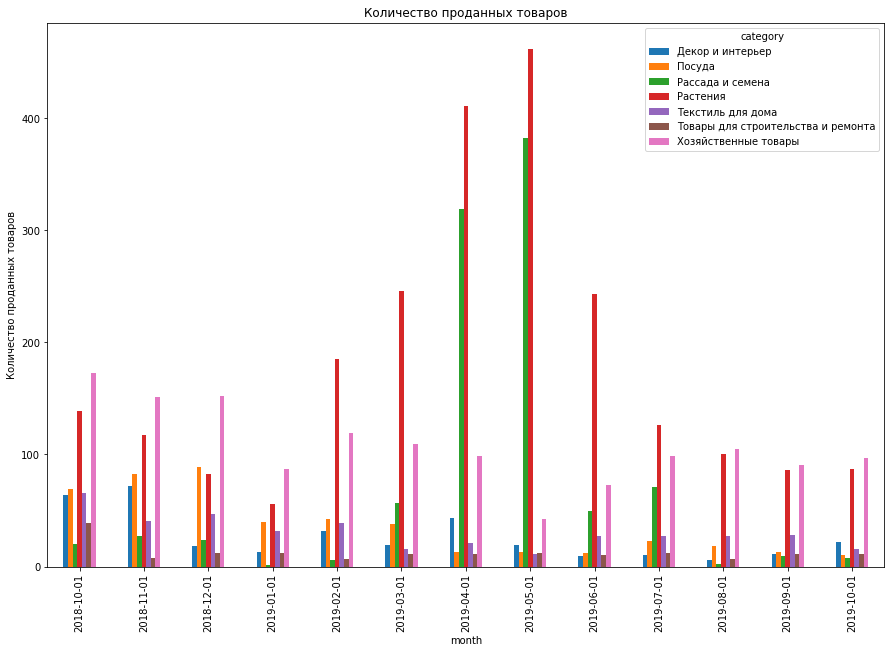

In [ ]:
data.pivot_table(index='category', columns='month', values='quantity', aggfunc='sum').T.plot(
    figsize=(15,10), ylabel='Количество проданных товаров', title='Количество проданных товаров',kind='bar')
plt.show()

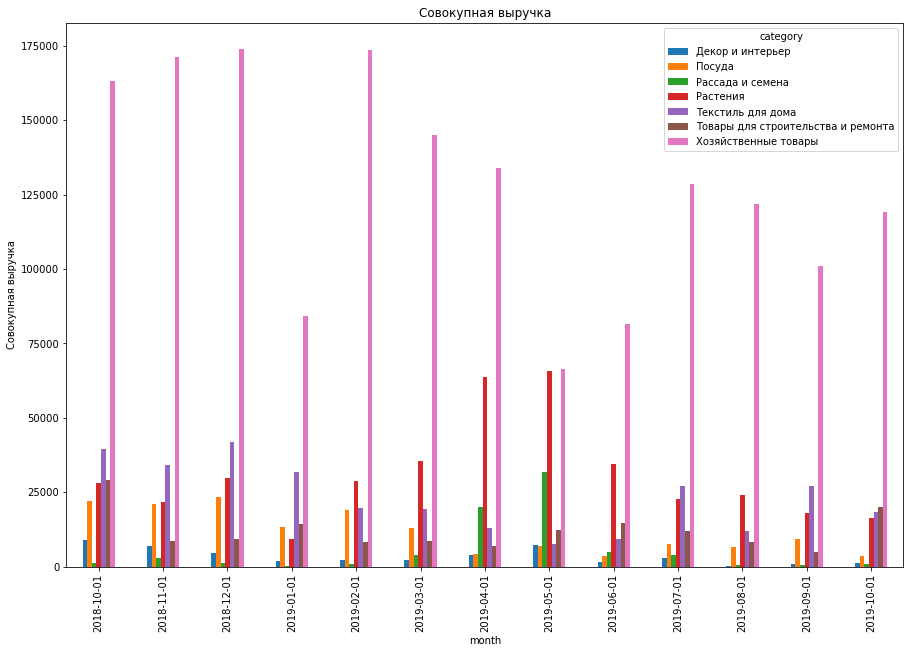

In [ ]:
data.pivot_table(index='category', columns='month', values='total', aggfunc='sum').T.plot(
    figsize=(15,10), ylabel='Совокупная выручка', title='Совокупная выручка',kind='bar')
plt.show()

Видим, покупки сезонны:
- Декор и интерьер: пик продаж в октябре, ноябре, мае. Спад: август, сентябрь.
- Посуда: пик в октябре, ноябре, декабре, феврале. Спад: аперль - август.
- Рассада и семена: пик в апреле-мае. Спад: октябрь, январь, февраль, августь ,сентябряь.
- Растения: пик в апреле-мае. Спад: январь.
- Текстиль для дома: пик в октябре-январе, июле, сентябре. Спад: апрель - июнь, август.
- Товары для строительства и ремонта: в целом - равномерное распределение, больше продаж в октябре.
- хозяйственные товары: пик продаж в октябре, ноябре, декабре, феврале. Спад:  январь, май, июнь.

Удивительно, что в 2019 г. октябрь показал меньше продаж по всем категориям, чем в 2018 г. Необходимо провести дополнительное исследование по этому поводу.

# Кластеризация покупателей на основе истории их покупок
Кластеризуем покупателей по показателям:
- Средний чек
- Кол-во товаров
- Общая сумма покупок
- Средняя цена товаров

In [ ]:
data.head()

,date,customer_id,order_id,product,quantity,price,total,category,month
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142.0,Растения,2018-10-01
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,194.0,Растения,2018-10-01
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,112.0,Растения,2018-10-01
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,179.0,Растения,2018-10-01
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,112.0,Растения,2018-10-01


In [ ]:
# Сгруппируем данные по пользователям:
data_by_customers = data.pivot_table(index = 'customer_id', values = ['quantity', 'price', 'total', 'order_id'],
                                     aggfunc = {'quantity': 'sum',
                                                'price': 'sum',
                                                'total': 'sum',
                                               'order_id': 'count'})
data_by_customers.head(5)

,order_id,price,quantity,total
customer_id,,,,
000d6849-084e-4d9f-ac03-37174eaf60c4,4,555.0,4,555.0
001cee7f-0b29-4716-b202-0042213ab038,1,442.0,1,442.0
00299f34-5385-4d13-9aea-c80b81658e1b,1,457.0,2,914.0
002d4d3a-4a59-406b-86ec-c3314357e498,1,1649.0,1,1649.0
003bbd39-0000-41ff-b7f9-2ddaec152037,1,1162.0,2,2324.0


In [ ]:
# Посчитаем среднюю стоимость товара по покупателю: разделим общуюю сумму на количество купленных товаров
data_by_customers['average'] = data_by_customers['total'] / data_by_customers['quantity']
# Посчитаем средний чек: разделим общую сумму на количество заказов:
data_by_customers['average_check'] = data_by_customers['total'] / data_by_customers['order_id']
data_by_customers

,order_id,price,quantity,total,average,average_check
customer_id,,,,,,
000d6849-084e-4d9f-ac03-37174eaf60c4,4,555.0,4,555.0,138.75,138.75
001cee7f-0b29-4716-b202-0042213ab038,1,442.0,1,442.0,442.00,442.00
00299f34-5385-4d13-9aea-c80b81658e1b,1,457.0,2,914.0,457.00,914.00
002d4d3a-4a59-406b-86ec-c3314357e498,1,1649.0,1,1649.0,1649.00,1649.00
003bbd39-0000-41ff-b7f9-2ddaec152037,1,1162.0,2,2324.0,1162.00,2324.00
...,...,...,...,...,...,...
ff601403-b094-4b86-9ac6-264d725b9277,1,1649.0,1,1649.0,1649.00,1649.00
ffaeab76-3a8d-49ee-860f-17273b2fc8a2,1,397.0,1,397.0,397.00,397.00
ffb5976a-7a4d-460b-95c4-5ffaba31cb24,1,389.0,1,389.0,389.00,389.00


In [ ]:
data_by_customers.sort_values('quantity', ascending=False).head(10)

,order_id,price,quantity,total,average,average_check
customer_id,,,,,,
c971fb21-d54c-4134-938f-16b62ee86d3b,133,131825.0,172,141644.0,823.511628,1064.992481
2a0acc09-e343-4f92-b5c0-f598ef2b07d4,31,1178.0,60,2280.0,38.000000,73.548387
0184f535-b60a-4914-a982-231e3f615206,30,3310.0,58,5891.0,101.568966,196.366667
d3b9ffea-d143-4747-8d59-74ab843d1ad6,51,2922.0,51,2922.0,57.294118,57.294118
97f94402-66c0-4995-b8d7-adb33eda71c8,16,1330.0,44,2394.0,54.409091,149.625000
4d93d3f6-8b24-403b-a74b-f5173e40d7db,34,29343.0,41,36086.0,880.146341,1061.352941
760aa067-90c3-4794-b7a9-a8831197388b,36,4389.0,37,4558.0,123.189189,126.611111
b6da6f7a-d2a3-424a-878e-1876c8b88126,14,942.0,35,2068.0,59.085714,147.714286
b6095dc9-1580-4d1f-8ba3-a554a8dab3bd,8,304.0,34,1292.0,38.000000,161.500000


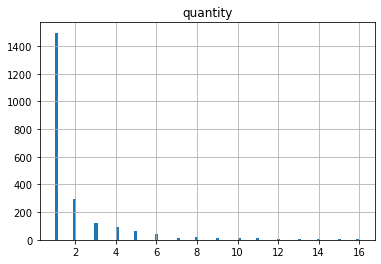

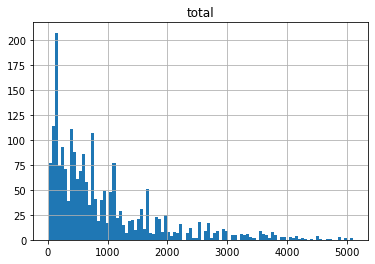

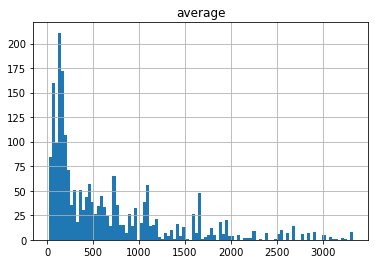

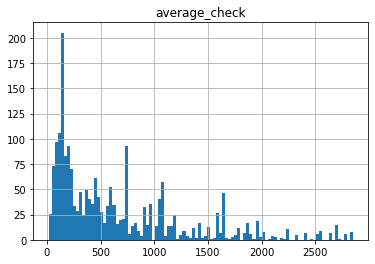

In [ ]:
# Т.к. ML не любит выбросы, удалим 2,5 % сверху:
for i in ['quantity','total', 'average', 'average_check'] :
    data_by_customers = data_by_customers[data_by_customers[i] <= np.percentile(data_by_customers[i], 97.5)]
    # взглянем на распределение полученных данных:
    data_by_customers[i].hist(bins=100)
    plt.title(i)
    plt.show()


Применим кластеризацию из ML (KMeans):

In [ ]:
# За основу возьмем 5 фич:
features = ['quantity','total', 'average', 'average_check', 'order_id']
X = data_by_customers[features]

In [ ]:
# Стандартизируем данные
sc = StandardScaler()
X_sc = sc.fit_transform(X)

# задаём число кластеров, равное 3, и фиксируем значение random_state для воспроизводимости результата:
km = KMeans(n_clusters=3, random_state=0)
# применяем алгоритм к данным и формируем вектор кластеров
labels = km.fit_predict(X_sc)
# создадим столбец, в который запишем номер кластера:
data_by_customers['cluster'] = labels

<div class="alert alert-block alert-info">
  
  <b>Комментарий cтудента V.2</b> Поняла, учту на будущее.

In [ ]:
data_by_customers = data_by_customers.reset_index()

In [ ]:
data_by_customers

,customer_id,order_id,price,quantity,total,average,average_check,cluster
0,000d6849-084e-4d9f-ac03-37174eaf60c4,4,555.0,4,555.0,138.75,138.75,1
1,001cee7f-0b29-4716-b202-0042213ab038,1,442.0,1,442.0,442.00,442.00,1
2,00299f34-5385-4d13-9aea-c80b81658e1b,1,457.0,2,914.0,457.00,914.00,1
3,002d4d3a-4a59-406b-86ec-c3314357e498,1,1649.0,1,1649.0,1649.00,1649.00,2
4,003bbd39-0000-41ff-b7f9-2ddaec152037,1,1162.0,2,2324.0,1162.00,2324.00,2
...,...,...,...,...,...,...,...,...
2048,ff601403-b094-4b86-9ac6-264d725b9277,1,1649.0,1,1649.0,1649.00,1649.00,2
2049,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,1,397.0,1,397.0,397.00,397.00,1
2050,ffb5976a-7a4d-460b-95c4-5ffaba31cb24,1,389.0,1,389.0,389.00,389.00,1
2051,ffb80538-3fda-4351-8ea9-9d2bec58bb07,1,974.0,1,974.0,974.00,974.00,2


In [ ]:
data = data.merge(data_by_customers, on = 'customer_id')
data.head()

,date,customer_id,order_id_x,product,quantity_x,price_x,total_x,category,month,order_id_y,price_y,quantity_y,total_y,average,average_check,cluster
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142.0,Растения,2018-10-01,7,1037.0,7,1037.0,148.142857,148.142857,0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,194.0,Растения,2018-10-01,7,1037.0,7,1037.0,148.142857,148.142857,0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,112.0,Растения,2018-10-01,7,1037.0,7,1037.0,148.142857,148.142857,0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,179.0,Растения,2018-10-01,7,1037.0,7,1037.0,148.142857,148.142857,0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,112.0,Растения,2018-10-01,7,1037.0,7,1037.0,148.142857,148.142857,0


In [ ]:
# Удалим лишние столбцы:
for i in ['price_y', 'quantity_y', 'total_y']:
    data = data.drop(i, axis=1)
data.head()

,date,customer_id,order_id_x,product,quantity_x,price_x,total_x,category,month,order_id_y,average,average_check,cluster
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142.0,Растения,2018-10-01,7,148.142857,148.142857,0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,194.0,Растения,2018-10-01,7,148.142857,148.142857,0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,112.0,Растения,2018-10-01,7,148.142857,148.142857,0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,179.0,Растения,2018-10-01,7,148.142857,148.142857,0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,112.0,Растения,2018-10-01,7,148.142857,148.142857,0


In [ ]:
# Взглянем на объем получившихся кластеров
data['cluster'].value_counts()

1    1675
0    1025
2     592
Name: cluster, dtype: int64

In [ ]:
data['customer_id'].nunique()

2053

Кластеризацию мы делали по сгруппированным данным data_by_customers, длина которых:

In [ ]:
len(data_by_customers)

2053

In [ ]:
# Переименуем столбцы:
data.rename(columns = {'quantity_x' : 'quantity', 'price_x' : 'price', 'total_x': 'total', 'order_id_x': 'order_id', 'order_id_y': 'quantity_order_id'}, inplace = True)

In [ ]:
data.head()

,date,customer_id,order_id,product,quantity,price,total,category,month,quantity_order_id,average,average_check,cluster
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142.0,Растения,2018-10-01,7,148.142857,148.142857,0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,194.0,Растения,2018-10-01,7,148.142857,148.142857,0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,112.0,Растения,2018-10-01,7,148.142857,148.142857,0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,179.0,Растения,2018-10-01,7,148.142857,148.142857,0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,112.0,Растения,2018-10-01,7,148.142857,148.142857,0


In [ ]:
# Посмотрим на получившиеся кластеры и категории в них:
data_by_clusters = data.groupby(['cluster', 'category']).agg(
    {'total': 'sum', 'quantity':'sum', 'order_id': 'count'})
data_by_clusters['average'] = data_by_clusters['total'] / data_by_clusters['quantity']
data_by_clusters['average_check'] = data_by_clusters['total'] / data_by_clusters['order_id']
data_by_clusters.style.background_gradient(subset=['total', 'quantity', 'order_id', 'average',  'average_check'], cmap='BuGn')

Опишем кластеры:
- 2 - "дойная корова": самая доходная категория - покупают дорогие товары, совсем не интересуются рассадой, а любимая категория - хозяйственные товары.
- 1 - "середняки": средний чек - до 500 ден. ед., любимые категории: растения и хоз товары.
- 0 - "пенсионеры-дачники": покупют мало, покупают дешевые товары с низким средним чеком, в основном - растения и рассаду.

Посмотрим на распределние данных по датам.

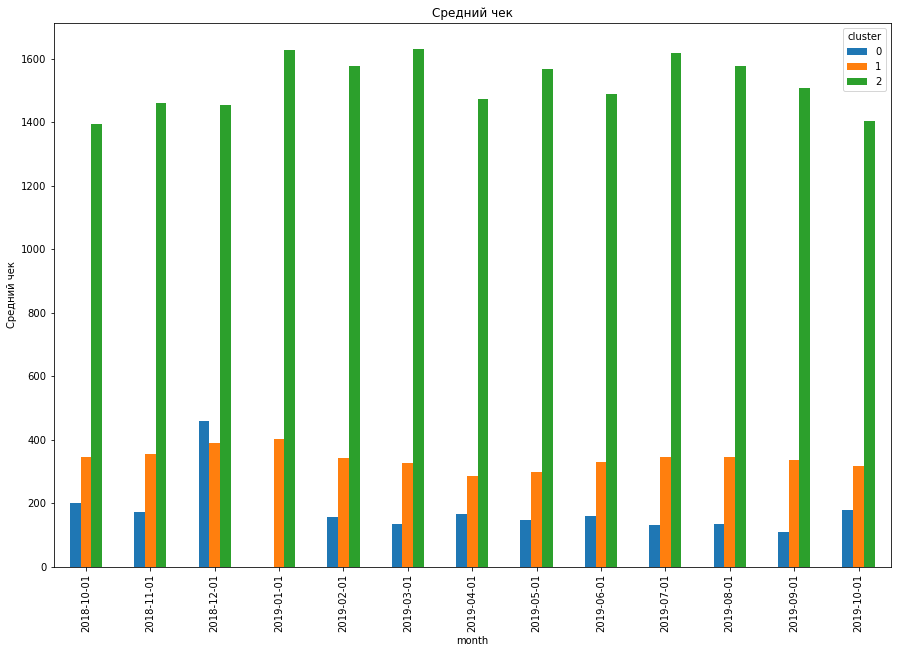

In [ ]:
data.pivot_table(index='cluster', columns='month', values='average_check', aggfunc='mean').T.plot(
    figsize=(15,10), ylabel='Средний чек', title='Средний чек',kind='bar')
plt.show()

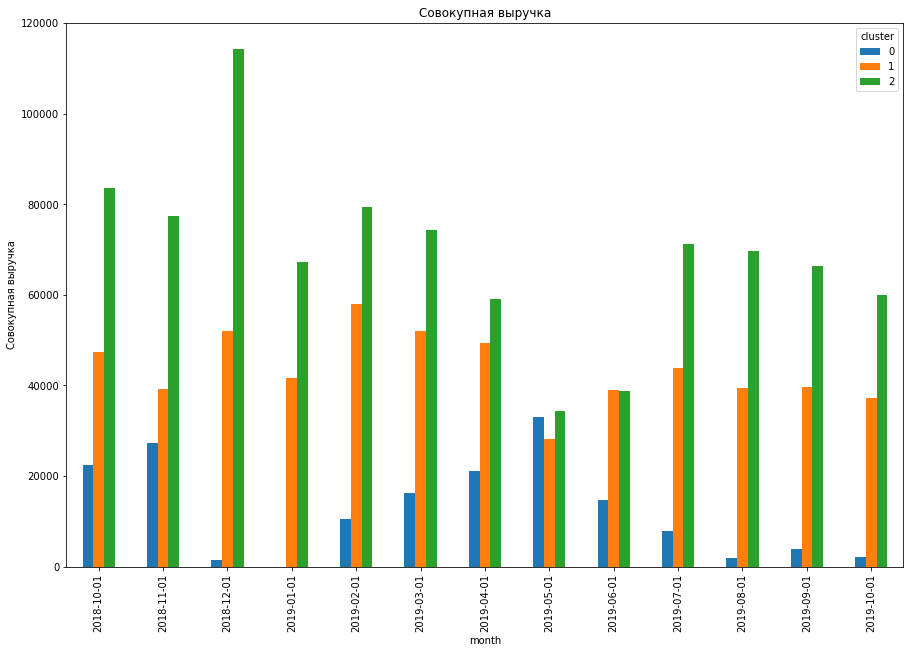

In [ ]:
data.pivot_table(index='cluster', columns='month', values='total', aggfunc='sum').T.plot(
    figsize=(15,10), ylabel='Совокупная выручка', title='Совокупная выручка',kind='bar')
plt.show()

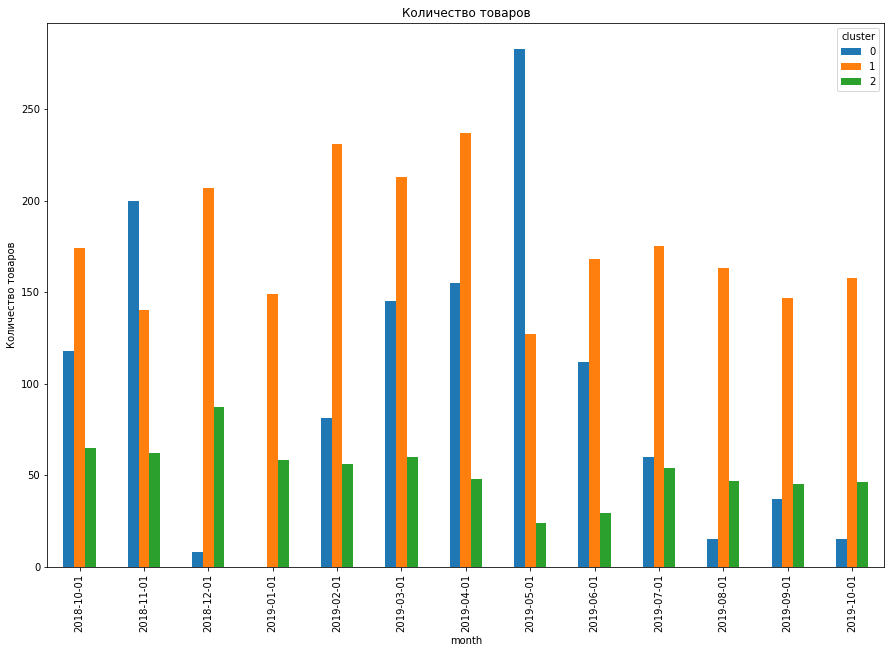

In [ ]:
data.pivot_table(index='cluster', columns='month', values='quantity', aggfunc='sum').T.plot(
    figsize=(15,10), ylabel='Количество товаров', title='Количество товаров',kind='bar')
plt.show()

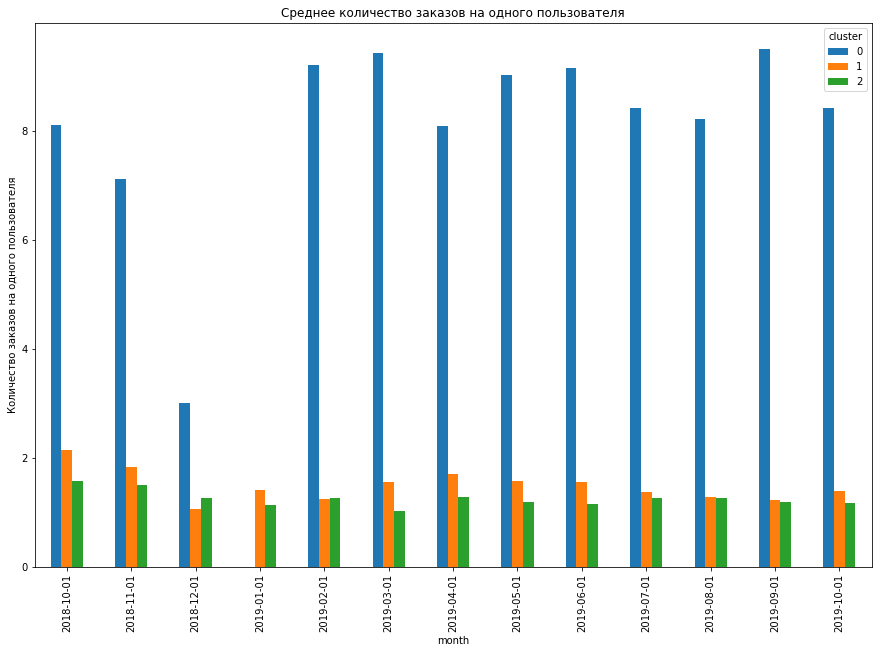

In [ ]:
data.pivot_table(index='cluster', columns='month', values='quantity_order_id', aggfunc='mean').T.plot(
    figsize=(15,10), ylabel='Количество заказов на одного пользователя', title='Среднее количество заказов на одного пользователя',kind='bar')
plt.show()

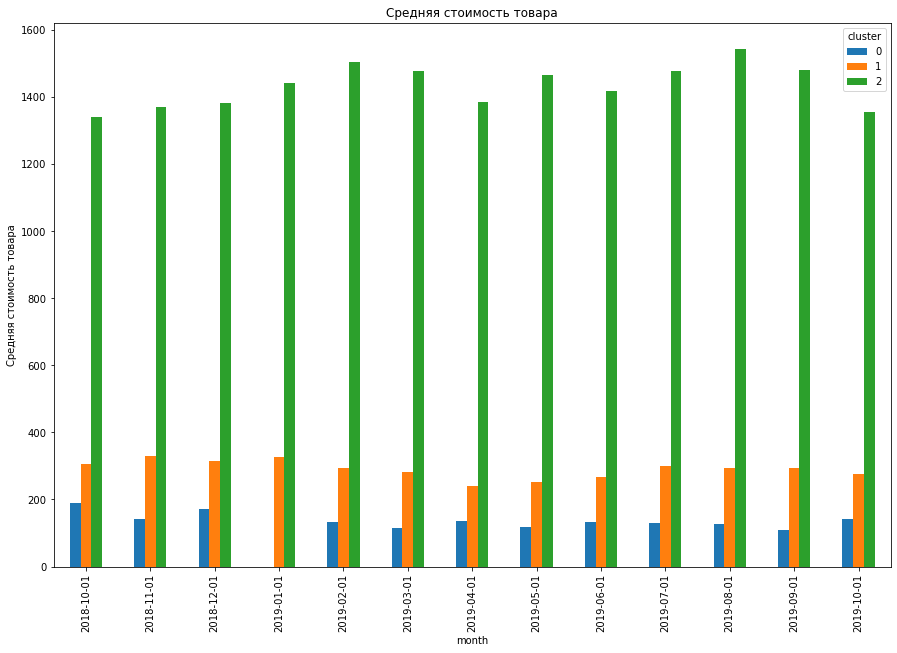

In [ ]:
data.pivot_table(index='cluster', columns='month', values='average', aggfunc='mean').T.plot(
    figsize=(15,10), ylabel='Средняя стоимость товара', title='Средняя стоимость товара',kind='bar')
plt.show()

Видим, что средний чек и средняя стоимость товара практически не зависят от сезонности.

По совокупной выручке: дойные коровы больше всего приносят выручки в декабре, а спад - в мае-июне. Середняки стабильны в течении года. А вот у пенсионеров-дачников: пик продаж - в мае. Декабрь-явнарь - мертвые месяцы.

По количеству товаров: сильная сезонность наблюдается у дачников: в фервале начинается рост, который достигает пика в мае и заканчивается к июлю.

По дачникам подозрительно то, что в октябре-ноябре 2018 г были высокие продажи, которые в октябре 2019 г. сильно снизились.  Необходимо дополнительно исследовать, с чем это связано.

Посмотрим на совокупную выручку по категориям по каждому кластеру в течении исследуемого периода:

Кластер: 0


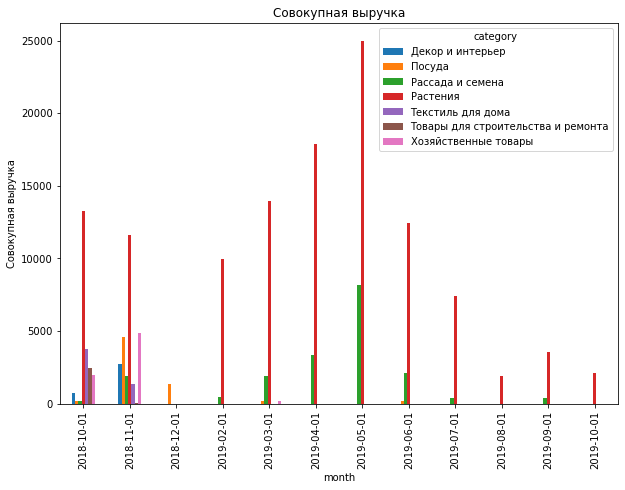

Кластер: 1


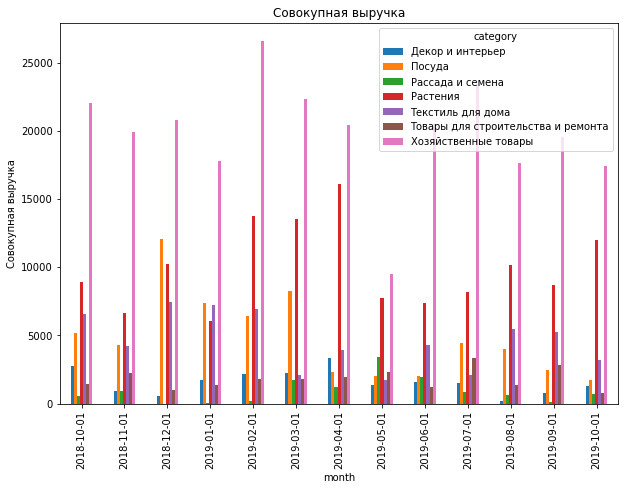

Кластер: 2


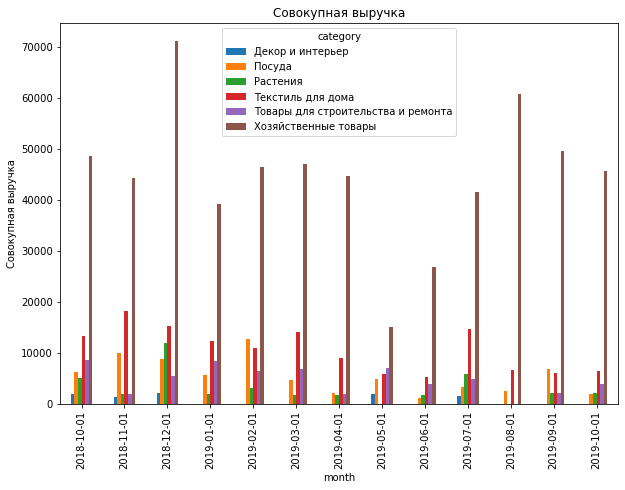

In [ ]:
for i in range(0,3):
    print('Кластер:', i)
    data.query('cluster == @i').pivot_table(index='category', columns='month', values='total', aggfunc='sum').T.plot(
        figsize=(10,7), ylabel='Совокупная выручка', title='Совокупная выручка',kind='bar')
    plt.show()

Вывод:
Для каждого кластера к пику - заранее давать рекламу и увеличивать ассортимент, к спаду нужно снижать ассортимент и количество товара на складе.
- пик выручки от "дойных коровх" приходится на категорию "Хозяйственные товары", особенно - в декабре и августе. Спад по хоз товарам - май-июнь.
- "середняки" - пик "посуды" в декабре, спад "хоз товаров" в мае, а пик - в феврале, пик растений - с февраля по апрель, пик "рассады" - с марта по июнь.
- "дачники" - Пик выручки от "пенсионеров" приходится на категорию “растения”: покупки начинаются в феврале, достигают пика в мае и затухают к августу. Следом идет “рассада”, которая с марта набирает обороты, достигает пика в мае и затухает к июлю.

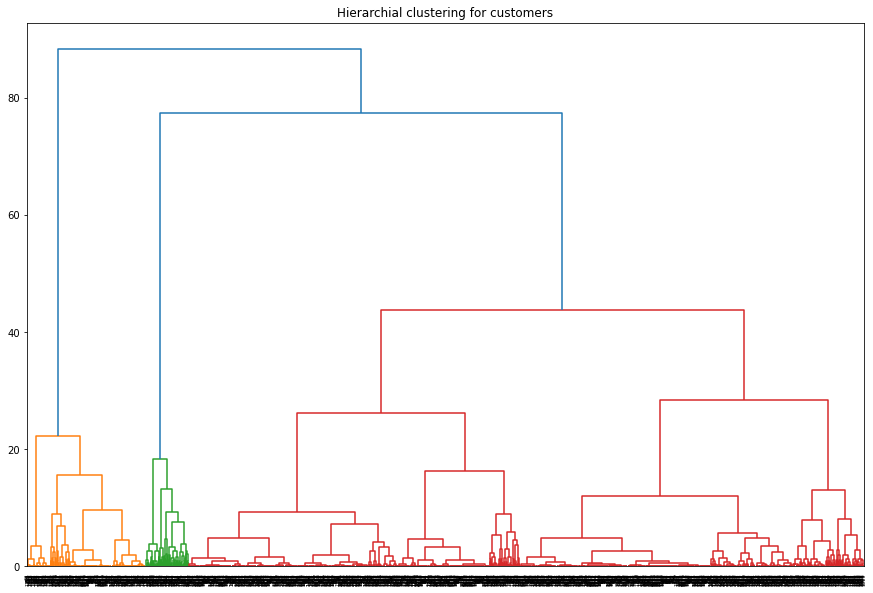

In [ ]:
# Дендрограмма:

linked = linkage(X_sc, method = 'ward')
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering for customers')
plt.show()

C:\programs\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


Text(0, 0.5, 'WCSS')

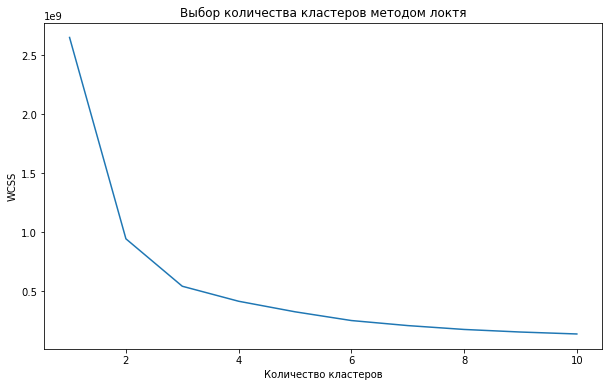

In [ ]:
# импортируем нужный класс
from sklearn.cluster import KMeans

# создадим пустой список для записи показателя WCSS (нашей ошибки)
wcss = []

# воспользуемся функцией range(), она возвращает последовательность чисел
# в данном случае числа от 1 до 10
for i in range(1, 11):

    # настроим параметры модели
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 100, random_state = 42)

    # обучим модель на наших данных с разным количеством кластеров
    kmeans.fit(X)

    # для каждого кластера рассчитаем ошибку (атрибут inertia_) и поместим в список
    wcss.append(kmeans.inertia_)

# зададим размер график
plt.figure(figsize = (10,6))
# передадим функции plot() последовательность кластеров и ошибку WCSS
plt.plot(range(1, 11), wcss)
# и добавим подписи
plt.title('Выбор количества кластеров методом локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')

По графику выше видим, что можно взять 2 или 3 кластера. Но с т зр смысла для бизнеса результаты, которые показывают 3 кластера, более применимы, чем 2. Поэтому выбираем 3.

# Проверка статистических гипотез

In [ ]:
# Н0 - два кластера похожи друг на друга по среднему чеку
# Н1 - два кластера отличаются друг от друга по среднему чеку
# Применим непараметрический тест Уилкоксона-Манна-Уитни:

# зададим критический уровень статистической значимости
alpha = 0.05

# проверим гипотезу о равенстве двух кластеров по среднему чеку (циклом сразу все кластеры)

for i in range(0,2):
    for j in range(i+1,3):
        print('Сравниваем 2 кластера:', i, j)
        results = st.mannwhitneyu(data.query('cluster == @i')['average_check'],
            data.query('cluster == @j')['average_check'])

        print('p-значение: ', results.pvalue)

        if results.pvalue < alpha:
            print('Отвергаем нулевую гипотезу: разница статистически значима')
        else:
            print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')

Сравниваем 2 кластера: 0 1
p-значение:  1.2043751400533067e-76
Отвергаем нулевую гипотезу: разница статистически значима
Сравниваем 2 кластера: 0 2
p-значение:  1.3329133174508796e-246
Отвергаем нулевую гипотезу: разница статистически значима
Сравниваем 2 кластера: 1 2
p-значение:  1.4494725554587507e-278
Отвергаем нулевую гипотезу: разница статистически значима


Видим, что разбивка на кластеры прошла успешно, мы действительно выделили 3 разных по среднему чеку кластера

In [ ]:
# Н0 - два кластера похожи друг на друга по общей выручке
# Н1 - два кластера отличаются друг от друга по общей выручке
# Применим непараметрический тест Уилкоксона-Манна-Уитни:

# зададим критический уровень статистической значимости
alpha = 0.05

# проверим гипотезу о равенстве двух кластеров по общей выручке  (циклом сразу все кластеры)

for i in range(0,2):
    for j in range(i+1,3):
        print('Сравниваем 2 кластера:', i, j)
        results = st.mannwhitneyu(data.query('cluster == @i')['total'],
            data.query('cluster == @j')['average_check'])

        print('p-значение: ', results.pvalue)

        if results.pvalue < alpha:
            print('Отвергаем нулевую гипотезу: разница статистически значима')
        else:
            print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')

Сравниваем 2 кластера: 0 1
p-значение:  3.221604855016266e-85
Отвергаем нулевую гипотезу: разница статистически значима
Сравниваем 2 кластера: 0 2
p-значение:  8.441057243076572e-246
Отвергаем нулевую гипотезу: разница статистически значима
Сравниваем 2 кластера: 1 2
p-значение:  1.0510653946136903e-277
Отвергаем нулевую гипотезу: разница статистически значима


Видим, что разбивка на кластеры прошла успешно, мы действительно выделили 3 разных по среднему чеку кластера

# Выводы

Покупатели разделены на 3 кластера:
- 2 - "дойная корова": самая доходная категория - покупают дорогие товары, совсем не интересуются рассадой, а любимая категория - хозяйственные товары.
Пик выручки от "дойных коровх" приходится на категорию "Хозяйственные товары", особенно - в декабре и августе. Спад по хоз товарам - май-июнь.
- 1 - "середняки": средний чек - до 500 ден. ед., любимые категории: растения и хоз товары.
Пик выручки от "середняков" приходится на категорию “хозяйственные товары” в феврале. "Посуда" лидирует в декабре, пик растений - с февраля по апрель, пик "рассады" - с марта по июнь.
- 0 - "пенсионеры-дачники": покупют мало, покупают дешевые товары с низким средним чеком, в основном - растения и рассаду.
Пик "растений" в мае, начинает расти в фервале и затухает к августу. Пик выручки от "пенсионеров" приходится на категорию “растения”: покупки начинаются в феврале, достигают пика в мае и затухают к августу. Следом идет “рассада”, которая с марта набирает обороты, достигает пика в мае и затухает к июлю.

Для каждого кластера к пику продаж необходимо заранее давать рекламу и увеличивать ассортимент, к спаду нужно снижать ассортимент и количество товара на складе.

Обратить внимание на те заказы, в которых более 6 штук каждого товара. Необходимо исследовать данную категорию, среди них есть оптовики, которым можно сделать специальное предложение.

В 2019 г. октябрь показал меньше продаж по всем категориям, чем в 2018 г. Необходимо провести дополнительное исследование по этому поводу.